In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import util
import warnings; 
warnings.simplefilter('ignore')

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the airquality training dataset
try:
    df = pd.read_csv("data/TrainingData.csv")
    print "Airquality dataset has {} samples with {} features each.".format(*df.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
print "\n", df.head()

Airquality dataset has 37821 samples with 95 features each.

   rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1      ...        \
0                          187.0                     0.3      ...     

In [2]:
# Display a description of the dataset
display(df.describe())

,rowID,chunkID,position_within_chunk,month_most_common,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
count,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000,37395.000000,36391.000000,9756.000000,36391.000000,9756.000000,...,35241.000000,1744.000000,6649.000000,5694.000000,9598.000000,37228.000000,36831.000000,1744.000000,37011.000000,1744.000000
mean,27735.342878,105.691415,96.809365,6.577695,11.501256,0.223785,189.561023,189.946812,5.175914,5.014463,...,1.791193,0.243089,1.392728,1.839491,2.744575,0.480062,0.770668,0.634703,0.915629,0.971857
std,16073.216333,60.880682,55.496493,3.446589,6.921352,0.344112,96.596566,96.304640,3.091361,2.970603,...,1.064498,0.331440,0.987366,1.008787,2.107100,0.301249,0.536628,0.282642,0.928582,0.992460
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.010000,0.100000,0.100000,0.100000,0.100000,...,0.000000,0.000000,0.133306,0.057648,0.097218,0.291653,0.291653,0.291653,-0.025698,0.051396
25%,13770.000000,53.000000,49.000000,4.000000,6.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,27749.000000,106.000000,97.000000,7.000000,12.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,41778.000000,159.000000,145.000000,9.000000,17.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,55368.000000,210.000000,192.000000,12.000000,23.000000,1.430000,360.000000,360.000000,23.000000,22.700000,...,19.361499,4.877184,9.997963,10.267026,15.759007,4.666455,4.569237,3.208188,13.054635,8.557467


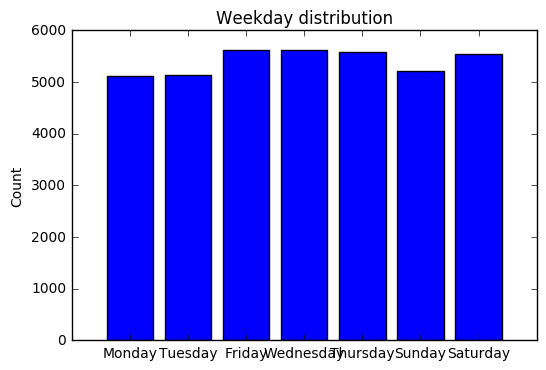

In [53]:
util.plotFeature(df['weekday'].value_counts().to_dict(), 'Weekday distribution')

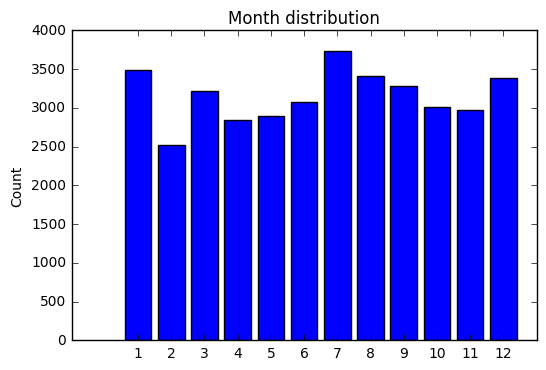

In [55]:
util.plotFeature(df['month_most_common'].value_counts().to_dict(), 'Month distribution')

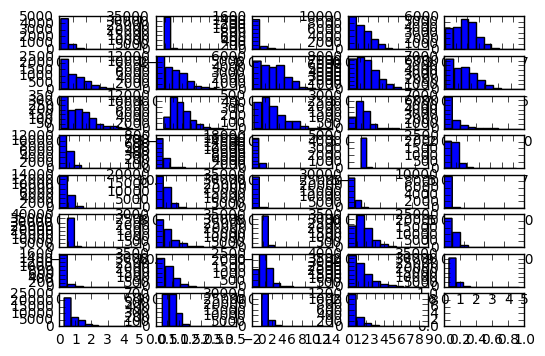

In [3]:
#data[pd.notnull(data['target_1_57'])].shape

features = df.columns.values
targets = [col for col in features if 'target' in col]
targets

target_data = df[targets]
#data[pd.notnull(data[targets])].shape

#target_data.dropna(how='all')

#util.plotFeatures(data['rowID'], data['target_1_57'])
#util.plotHistogram(data['target_1_57'])

fig, ax = plt.subplots(nrows=8,ncols=5)
count = 1
for target in targets:
    d = target_data[target].dropna()   
    plt.subplot(8,5, count)
    plt.hist(d)
    count = count + 1
plt.show()

#TODO plot hour per day

In [4]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error

# remove rows with NA values for targets
#data = data[pd.notnull(data['target_1_57'])]

#x_train = data[['chunkID', 'position_within_chunk']]
#y_train = data['target_1_57']

# gridsearch
#cv_params = {'max_depth': [1], 'min_child_weight': [1]}
#ind_params = {'objective': 'reg:linear'}
#gridSearchCV = GridSearchCV(xgb.XGBClassifier(**ind_params), 
#                            cv_params, 
#                            scoring = 'mean_absolute_error', cv = 2, n_jobs = -1)

#gridSearchCV.fit(x_train, y_train)

#data['weekday'].shape
#pd.notnull(data['weekday']).shape

#dayOfWeek={'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
#data['weekday'] = data['weekday'].map(dayOfWeek)

# Transforms categorical features to numeric
# one hot encoding
#cols_to_transform = [ 'chunkID', 'position_within_chunk', 'month_most_common', 'weekday', 'hour']
#data = pd.get_dummies(df, columns = cols_to_transform)
#x_train_encoded.shape
#x_train.shape

/home/ger/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ger/.local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [7]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import pickle

# XGB cross validation

dayOfWeek={'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df['weekday'] = df['weekday'].map(dayOfWeek)

params = {'eta': 1, 'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1}

train_features = ['chunkID', 'position_within_chunk', 'month_most_common', 'hour', 'weekday']
cols_to_transform = ['chunkID', 'position_within_chunk', 'month_most_common']

# build a model for each target variable
means = list()
for target in targets[0:2]:
    target_data = df[pd.notnull(df[target])]
    x_train = target_data[train_features]
    y_train = target_data[target]    
    x_train_encoded = pd.get_dummies(x_train, columns = cols_to_transform)

    print(x_train.shape)
    print(x_train_encoded.shape)
    
    xgdmat = xgb.DMatrix(x_train_encoded, y_train)             # Create a DMatrix to make XGBoost more efficient
    cv_xgb = xgb.cv(params = params, dtrain = xgdmat, num_boost_round = 500, nfold = 10,
                    metrics = ['mae'], # Make sure you enter metrics inside a list or you may encounter issues!
                    early_stopping_rounds = 100) # Look for early stopping that minimizes error
    #pickle.dump(cv_xgb, open('models/' + target + "_model.dat", "wb"))
    mean_mae_test = np.mean(cv_xgb['test-mae-mean'])
    means.append(mean_mae_test)
    
    print(target)
    print(mean_mae_test)
    
print(np.mean(means))

(5694, 5)
(5694, 238)
target_1_57
0.54776275
(37011, 5)
(37011, 414)
target_10_4002
0.4019601514
0.4748614507


In [8]:
#TODO

#trainingdata -> train_test_split

# for each target -> 
# train a model 
# by one hot encoding categorical features
# use gridsearchCV to determine parameters
# save each model
# predict on dataset
# average testing score to have final score
# compare with benchmark


In [ ]:
# split
from sklearn.cross_validation import train_test_split

# gridsearch
#cv_params = {'max_depth': [1,3,5], 'min_child_weight': [1,3,5]}
cv_params = {'max_depth': [1], 'min_child_weight': [1]}
ind_params = {'objective': 'reg:linear'}

train_features = ['chunkID', 'position_within_chunk', 'month_most_common', 'hour', 'weekday']
cols_to_transform = ['chunkID', 'position_within_chunk', 'month_most_common']

for target in targets[0:1]:
    
    X = df[train_features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    
    # remote NA rows 
    not_null_indexes = pd.notnull(y_train)
    x_train = X_train[not_null_indexes]
    y_train = y_train[not_null_indexes]   
    x_train_encoded = pd.get_dummies(x_train, columns = cols_to_transform)
    gridSearch = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                                cv_params, 
                                scoring = 'neg_mean_absolute_error', cv = 2, n_jobs = 1)

    gridSearch.fit(x_train_encoded, y_train)
    print(gridSearch.best_params_)
    print(-gridSearch.best_score_)
    
    param = gridSearch.bestparams
    param[‘objective’] = ‘reg:linear’
    clf = XGBClassifier(*param)
    
    x_test_encoded = pd.get_dummies(X_test, columns = cols_to_transform)
    testdmat = xgb.DMatrix(x_test_encoded)
    y_pred = clf.predict(testdmat)
    error = mean_absolute_error(y_pred, y_test)
    print(error)
    

In [ ]:
#X_train.shape

In [ ]:
# plot feature importances

#features = [ "your list of features ..." ]
#mapFeat = dict(zip(["f"+str(i) for i in range(len(features))],features))
#ts = pd.Series(clf.booster().get_fscore())
#ts.index = ts.reset_index()['index'].map(mapFeat)
#ts.order()[-15:].plot(kind="barh", title=("features importance"))